In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor


sns.set()
data = pd.read_csv("car_dataset.csv")
data.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [2]:
data = data.dropna(axis=0) # 320 rows dropped 
data = data.drop_duplicates().reset_index(drop=True) # 50 rows dropped
data.describe(include="all") 

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3975,3975.000000,3975,3975.000000,3975.000000,3975,3975,3975.000000,3975
unique,7,NaN,6,NaN,NaN,4,2,NaN,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,871,NaN,1518,NaN,NaN,1832,3604,NaN,181
mean,NaN,19056.936091,NaN,164.820126,2.763643,NaN,NaN,2006.290063,NaN
std,NaN,24976.141632,NaN,103.117252,4.965189,NaN,NaN,6.683223,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6950.000000,NaN,92.000000,1.800000,NaN,NaN,2002.000000,NaN
50%,NaN,11400.000000,NaN,159.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21317.500000,NaN,230.000000,3.000000,NaN,NaN,2011.000000,NaN


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
3970,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla
3971,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
3972,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
3973,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520


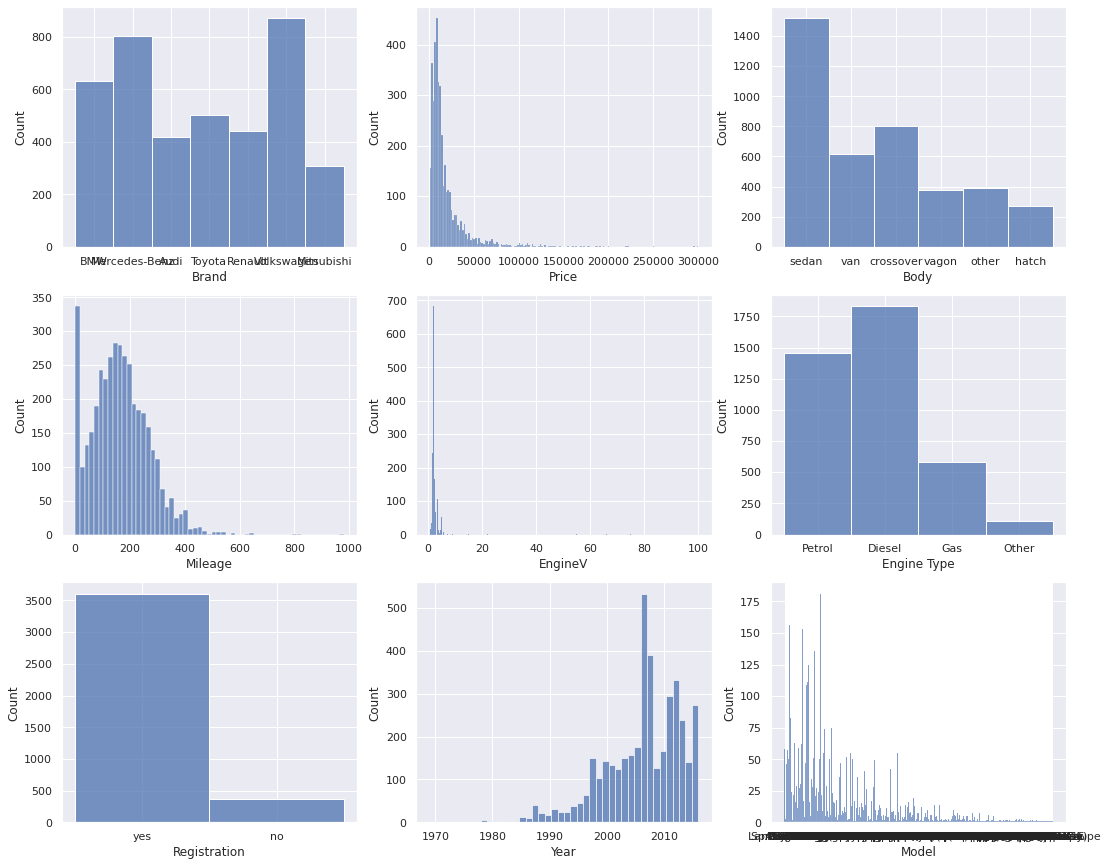

In [3]:
n = 3
f, axs = plt.subplots(n,3, figsize=(18,n*5))
columns = iter(data.columns)
for i in range(n):
    for ax in axs[i]:
        sns.histplot(x=data[next(columns)], ax=ax)
data

### At first glance we can see that Mlieage, EngineV, Year and Models have outliers.

In [4]:
q = data['Mileage'].quantile(0.99)
data = data.drop(data.loc[data["Mileage"] > q].index)\
    .reset_index(drop=True)
data.describe() # 41 rows has been dropped

,Price,Mileage,EngineV,Year
count,3935.000000,3935.000000,3935.000000,3935.000000
mean,19166.320447,161.176366,2.767695,2006.387294
std,25048.966945,96.379226,4.989625,6.606558
min,600.000000,0.000000,0.600000,1969.000000
25%,7000.000000,91.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2007.000000
75%,21500.000000,230.000000,3.000000,2011.000000
max,300000.000000,435.000000,99.990000,2016.000000


In [5]:
q = data['Year'].quantile(0.01)
q
data = data.drop(data.loc[data["Year"] < q].index)\
    .reset_index(drop=True)

data.describe()  

,Price,Mileage,EngineV,Year
count,3899.000000,3899.000000,3899.000000,3899.000000
mean,19309.714724,160.918954,2.774783,2006.598872
std,25113.958391,96.118621,5.011820,6.248502
min,800.000000,0.000000,0.600000,1987.000000
25%,7000.000000,91.000000,1.800000,2003.000000
50%,11500.000000,157.000000,2.200000,2008.000000
75%,21650.000000,228.000000,3.000000,2012.000000
max,300000.000000,435.000000,99.990000,2016.000000


### over 2% of models apear only one, so those haven't any predictic power anyway

In [6]:
histogram = data[["Model"]]
histogram["Count"] = np.ones(data.last_valid_index()+1)
histogram = histogram.groupby("Model")\
    .count()
q = 50

counts = iter(histogram["Count"])
models_to_drop = [model for model in histogram["Count"].keys() if next(counts) < q]

len(models_to_drop) 

# for model in models_to_drop:
#     data = data.drop(data.loc[data["Model"] == model].index)

# data = data.reset_index(drop=True)
# data.describe() # 40 rows has been dropped    

/tmp/ipykernel_34245/1166815731.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  histogram["Count"] = np.ones(data.last_valid_index()+1)


275

# 275 models appear less than 50 times, that's why I dropped Model's column

In [7]:
data = data.drop(["Model"], axis=1)

According to Google, the biggest EngineV which exist is equal to 8,3l, so I drop all values bigger than that value

In [8]:
data = data.drop(data.loc[data["EngineV"] > 8.2].index)\
    .reset_index(drop=True)
data.describe() #has been dropped 21 rows

,Price,Mileage,EngineV,Year
count,3878.000000,3878.000000,3878.000000,3878.000000
mean,19374.845722,160.698814,2.469559,2006.617844
std,25163.371386,96.136733,0.979079,6.244516
min,800.000000,0.000000,0.600000,1987.000000
25%,7150.000000,90.000000,1.800000,2003.000000
50%,11500.000000,157.000000,2.200000,2008.000000
75%,21775.000000,227.000000,3.000000,2012.000000
max,300000.000000,435.000000,7.200000,2016.000000


In [9]:
4345-3798.000000 # 547.0
547.0/4345 # 13%

0.12589182968929805

### *In total I have dropped 13% of rows - 547*

# Now when data is cleaned I can looks for in- and dependent variables 

In [10]:
x = data[[column for column in data.columns if column!= "Price"]]
y = np.log(data["Price"])

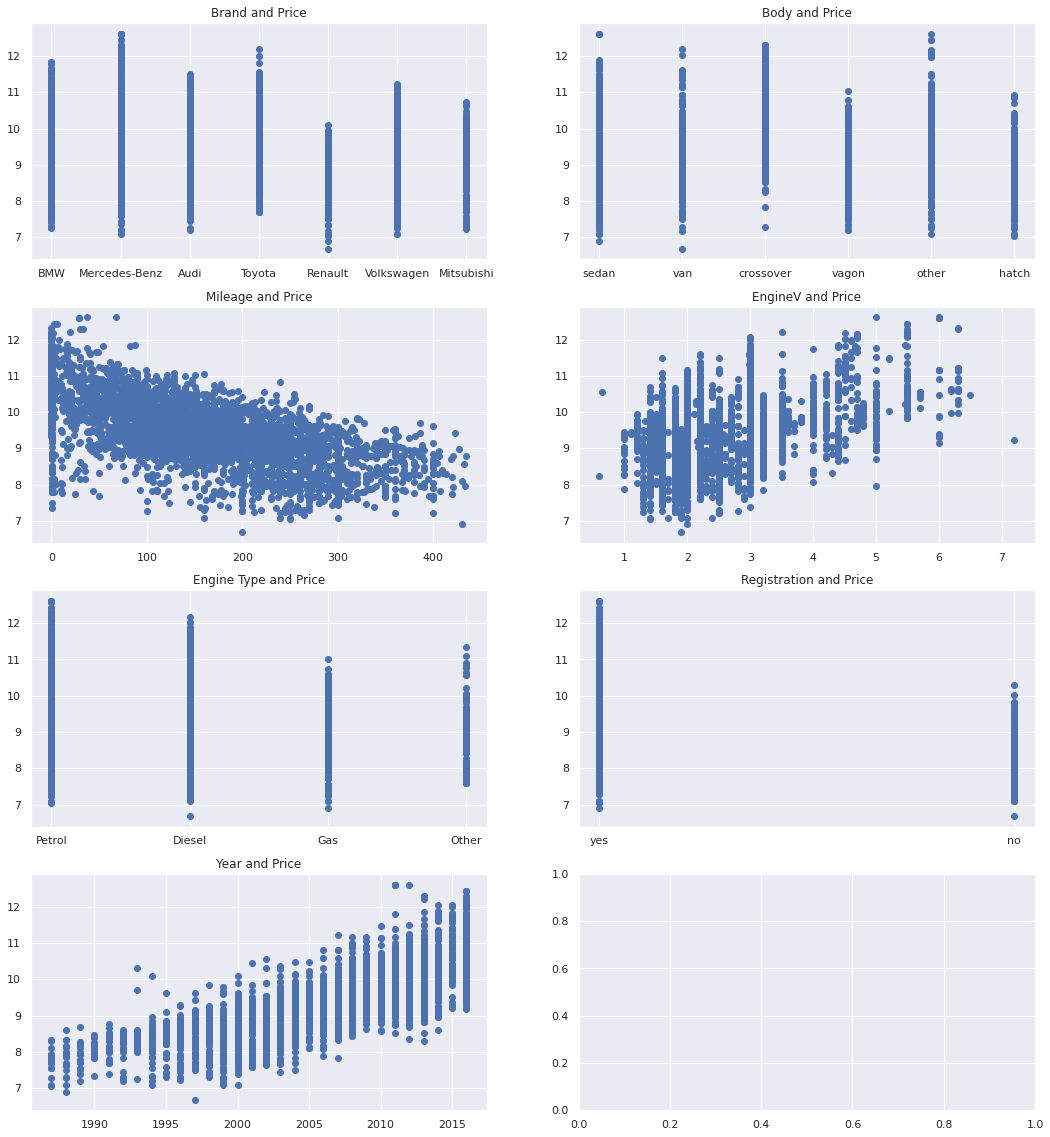

In [11]:
n = 4
f, axs = plt.subplots(n,2, figsize=(18,n*5))
columns = iter(x.columns)
for i in range(n):
    for ax in axs[i]:
        try:
            column = next(columns)
            ax.scatter(data[column], y)
            ax.set_title(column + " and Price")
        except:
            pass


Firstly I made plots of each variable and Price but plots show much more when we log(Price). <p>
Plot of Model and log(Price) doesn't show any pattern, but other plots with continues variables looks promising.

In [12]:
continues_independent = x[['Mileage', "EngineV", "Year"]]
p_values = f_regression(continues_independent,y)[1].round(3)
p_values # p_values looks great
continues_independent

,Mileage,EngineV,Year
0,277,2.0,1991
1,427,2.9,1999
2,358,5.0,2003
3,240,4.2,2007
4,120,2.0,2011
...,...,...,...
3873,163,2.5,2008
3874,35,1.6,2014
3875,9,3.0,2014
3876,1,3.5,1999


In [13]:
x_with_dummies = pd.get_dummies(x, drop_first=True)
x_with_dummies.head(3)

,Mileage,EngineV,Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,1991,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,1999,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,2003,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1


## time for standarization and see I have

In [14]:
scaler = StandardScaler().fit(x_with_dummies)
inputs = scaler.transform(x_with_dummies)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(inputs, y, test_size=0.2, random_state=42)

In [16]:
reg = LinearRegression().fit(x_train,y_train)
weights = reg.coef_
summary_table = pd.DataFrame({"Feature":x_with_dummies.columns, "Weights":weights})
summary_table["VIF"] = [variance_inflation_factor(x_with_dummies.values, i) for i in range(x_with_dummies.shape[1])]
summary_table

,Feature,Weights,VIF
0,Mileage,-0.131284,4.766304
1,EngineV,0.247094,11.761139
2,Year,0.511899,44.176573
3,Brand_BMW,0.021588,2.591629
4,Brand_Mercedes-Benz,0.017814,3.134322
5,Brand_Mitsubishi,-0.131502,1.941737
6,Brand_Renault,-0.198201,2.439590
7,Brand_Toyota,-0.080559,2.466229
8,Brand_Volkswagen,-0.102594,3.436328
9,Body_hatch,-0.090018,1.700217


In [17]:
x_with_dummies= x_with_dummies.drop(["Registration_yes"], axis=1)

In [18]:
scaler = StandardScaler().fit(x_with_dummies)
inputs = scaler.transform(x_with_dummies)
x_train, x_test, y_train, y_test = train_test_split(inputs, y, test_size=0.2, random_state=42)

reg = LinearRegression().fit(x_train,y_train)
weights = reg.coef_
summary_table = pd.DataFrame({"Feature":x_with_dummies.columns, "Weights":weights})
summary_table["VIF"] = [variance_inflation_factor(x_with_dummies.values, i) for i in range(x_with_dummies.shape[1])]
summary_table

,Feature,Weights,VIF
0,Mileage,-0.142019,4.572205
1,EngineV,0.255974,11.753256
2,Year,0.570459,33.555463
3,Brand_BMW,0.024347,2.591086
4,Brand_Mercedes-Benz,0.042947,3.113021
5,Brand_Mitsubishi,-0.113182,1.933178
6,Brand_Renault,-0.162264,2.409455
7,Brand_Toyota,-0.057005,2.448214
8,Brand_Volkswagen,-0.069431,3.405751
9,Body_hatch,-0.102915,1.694407


## VIF was very high for Year and Registration_yes, so I removed them, but then I restore Year and predictions are better, because weight of the Year is high

In [19]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)

df_pf = pd.DataFrame()   #dataFrame performance
df_pf["Predicted"] = np.exp(reg.predict(x_test))

y_test = y_test.reset_index(drop=True) # <- necessary line
df_pf["Target"] = np.exp(y_test)
df_pf["Difference[%]"] = abs(df_pf["Predicted"]-df_pf["Target"])/df_pf["Target"]*100
df_pf = df_pf.sort_values(by="Difference[%]").reset_index(drop=True)
df_pf.head()


,Predicted,Target,Difference[%]
0,20910.31,20900.00,0.05
1,34866.95,34900.00,0.09
2,14618.92,14600.00,0.13
3,32926.61,33000.00,0.22
4,9677.89,9700.00,0.23


In [20]:
r2 = reg.score(x_train,y_train) 

n = x_train.shape[0]
p = x_train.shape[1]

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
"R^2 and R^2 adjusted: ", r2.round(3), adjusted_r2.round(3)

('R^2 and R^2 adjusted: ', 0.819, 0.818)

Text(0, 0.5, 'test values')

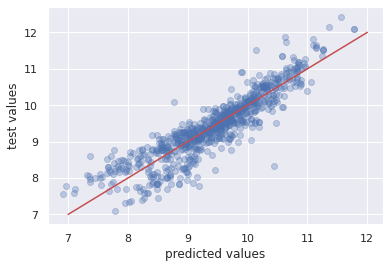

In [21]:
sns.set()
plt.scatter(reg.predict(x_test), y_test, alpha = 0.3)
plt.plot(np.linspace(7, 12), np.linspace(7, 12), "r")
plt.xlabel("predicted values")
plt.ylabel("test values")

Text(0.5, 1.0, 'Residuals PDF')

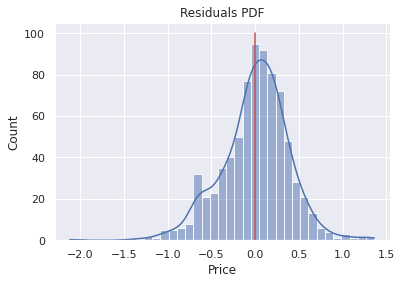

In [22]:
sns.histplot(x=y_test - reg.predict(x_test), kde=True)
plt.plot(np.zeros(50), np.linspace(0, 100), "r")
plt.title("Residuals PDF")

In [23]:
p_values = f_regression((y_test - reg.predict(x_test)).values.reshape(-1, 1), y_test)[1].round(3)
p_values # p_values looks great

array([0.])

Zad 2

Błąd średniokwadratowy modelu liniowego: 0.151

Błąd średniokwadratowy modelu GLM: 0.111

Błąd średniokwadratowy modelu SVR: 0.0944
Błąd średniokwadratowy modelu RF: 0.104
Błąd średniokwadratowy modelu XGB: 0.145


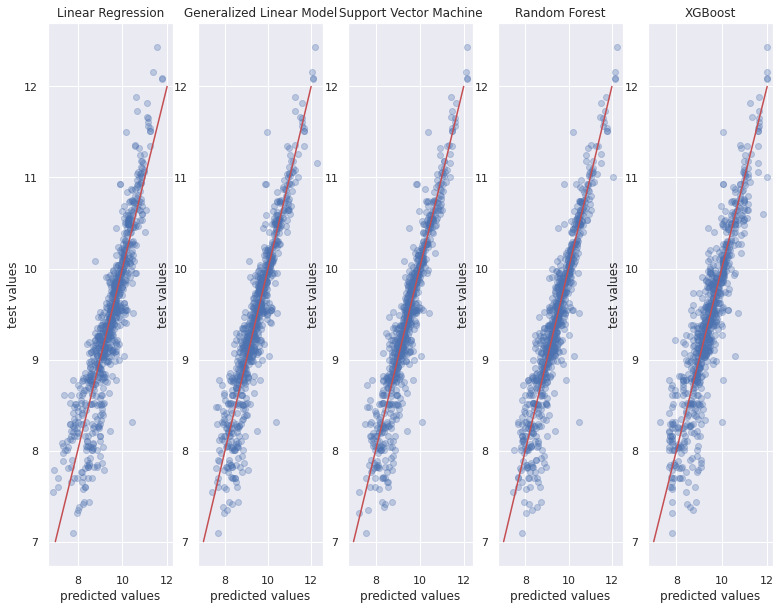

In [34]:
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train,y_train)
MSE_reg = mean_squared_error(y_test, reg.predict(x_test))
print(f'Błąd średniokwadratowy modelu liniowego: {MSE_reg:0.3}\n')


# ===== Uogólniony model liniowy (ang. Generalized Linear Model) =====
from sklearn.preprocessing import PolynomialFeatures
model_GLM = LinearRegression()
gen_features = PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)
model_GLM.fit(gen_features.fit_transform(x_train), y_train)
# print(f'Parametry modelu GLM: {np.round(model_GLM.coef_,4)}, {np.round(model_GLM.intercept_,5)}')
MSE_GLM = mean_squared_error(y_test, model_GLM.predict(gen_features.fit_transform(x_test)))
print(f'Błąd średniokwadratowy modelu GLM: {MSE_GLM:0.3}\n')

#==== Maszyna wektorów wspierających (ang. Support Vector Machine) ====
# SVR dla regresji, SVC dla kalsyfikacji
from sklearn.svm import SVR
model_svr = SVR(kernel='rbf', gamma='scale', C=3.0)
model_svr.fit(x_train, y_train)
MSE_SVR = mean_squared_error(y_test, model_svr.predict(x_test))
print(f'Błąd średniokwadratowy modelu SVR: {MSE_SVR:0.3}')

#==== Las losowy (ang. Random Forest) ====
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(x_train, y_train)
MSE_RF = mean_squared_error(y_test, model_rf.predict(x_test))
print(f'Błąd średniokwadratowy modelu RF: {MSE_RF:0.3}')


import xgboost as xgb

D_train = xgb.DMatrix(x_train, label=y_train)
D_test = xgb.DMatrix(x_test, label=y_test)
param = {'max_depth': 30, 'eta': 1, 'objective': 'reg:squarederror'}
model_xgb = xgb.train(param, D_train, 2)
MSE_XGB = mean_squared_error(y_test, model_xgb.predict(D_test))
print(f'Błąd średniokwadratowy modelu XGB: {MSE_XGB:0.3}')

# Wizualizacja
f, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(1,5, figsize=(13, 10))

ax0.set_title('Linear Regression')
ax0.scatter(reg.predict(x_test), y_test, alpha = 0.3)
ax0.plot(np.linspace(7, 12), np.linspace(7, 12), "r")
ax0.set_xlabel("predicted values")
ax0.set_ylabel("test values")

ax1.set_title('Generalized Linear Model')
ax1.scatter(model_GLM.predict(gen_features.fit_transform(x_test)), y_test, alpha = 0.3)
ax1.plot(np.linspace(7, 12), np.linspace(7, 12), "r")
ax1.set_xlabel("predicted values")
ax1.set_ylabel("test values")

ax2.set_title('Support Vector Machine')
ax2.scatter(model_svr.predict(x_test), y_test, alpha = 0.3)
ax2.plot(np.linspace(7, 12), np.linspace(7, 12), "r")
ax2.set_xlabel("predicted values")
ax2.set_ylabel("test values")

ax3.set_title('Random Forest')
ax3.scatter(model_rf.predict(x_test), y_test, alpha = 0.3)
ax3.plot(np.linspace(7, 12), np.linspace(7, 12), "r")
ax3.set_xlabel("predicted values")
ax3.set_ylabel("test values")

ax4.set_title('XGBoost')
ax4.scatter(model_xgb.predict(D_test), y_test, alpha = 0.3)
ax4.plot(np.linspace(7, 12), np.linspace(7, 12), "r")
ax4.set_xlabel("predicted values")
ax4.set_ylabel("test values")

plt.show()


In [25]:
r2 = reg.score(x_train,y_train) 

n = x_train.shape[0]
p = x_train.shape[1]

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
"R^2 and R^2 adjusted Linear Regression: ", r2.round(3), adjusted_r2.round(3)

('R^2 and R^2 adjusted Linear Regression: ', 0.819, 0.818)

In [26]:
r2 = model_GLM.score(gen_features.fit_transform(x_train), y_train)

n = x_train.shape[0]
p = x_train.shape[1]

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
"R^2 and R^2 adjusted Generalized Linear Model: ", r2.round(3), adjusted_r2.round(3)

('R^2 and R^2 adjusted Generalized Linear Model: ', 0.878, 0.877)

In [27]:
r2 = model_svr.score(x_train,y_train) 

n = x_train.shape[0]
p = x_train.shape[1]

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
"R^2 and R^2 adjusted for Supprt Vector Machine: ", r2.round(3), adjusted_r2.round(3)

('R^2 and R^2 adjusted for Supprt Vector Machine: ', 0.904, 0.903)

In [28]:
r2 = model_rf.score(x_train,y_train) 

n = x_train.shape[0]
p = x_train.shape[1]

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
"R^2 and R^2 adjusted for Random Forest: ", r2.round(3), adjusted_r2.round(3)

('R^2 and R^2 adjusted for Random Forest: ', 0.981, 0.981)